In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore') 

sns.set();

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("mnistData/A_Z Handwritten Data.csv").astype('float32');
data.rename(columns={'0':'label'}, inplace = True);

# Splite data the X - Our data , and y - the prdict label
X = data.drop('label', axis = 1);
y = data['label'];

In [3]:
X.shape

(372450, 784)

In [4]:
len(X.iloc[1])

784

In [5]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


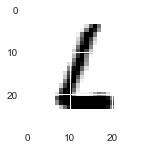

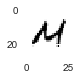

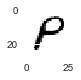

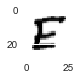

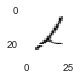

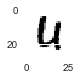

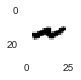

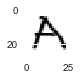

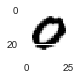

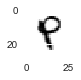

In [6]:
from sklearn.utils import shuffle
X_shuffle = shuffle(X);

plt.figure(figsize = (12, 10));
row, columns = 4, 4;
for i in range(10):
    plt.subplot(columns, row, i+1);
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
    plt.show()

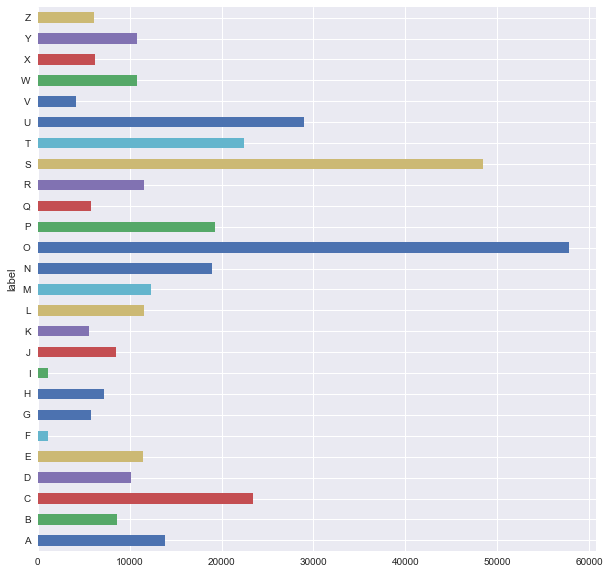

In [7]:
#change labels to alphabets

alphabets_mapper = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 
                13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'};
data_alpabet = data.copy();
data['label'] = data['label'].map(alphabets_mapper);

label_size = data.groupby('label').size();
label_size.plot.barh(figsize=(10,10));
plt.show();

In [8]:
print(label_size.min());
print(label_size.max());

1120
57825


In [9]:
#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y);

#scale data
standard_scaler = MinMaxScaler();
standard_scaler.fit(X_train);

X_train = standard_scaler.transform(X_train);
X_test = standard_scaler.transform(X_test);

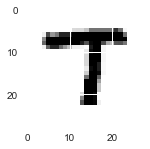

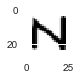

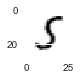

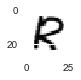

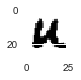

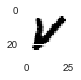

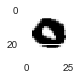

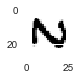

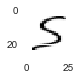

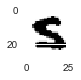

In [10]:
#data after scaling
X_shuffle = shuffle(X_train);

plt.figure(figsize = (12, 10));
row, columns = 4, 4;
for i in range(10):
    plt.subplot(columns, row, i+1);
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
    plt.show()

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32');
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32');

y_train = np_utils.to_categorical(y_train);
y_test = np_utils.to_categorical(y_test);

In [12]:
#building model
cls = Sequential();
cls.add(Conv2D(32, (5,5), input_shape = (28, 28, 1), activation = 'relu'));
cls.add(MaxPooling2D(pool_size=(2, 2)));
cls.add(Dropout(0.3));
cls.add(Flatten());
cls.add(Dense(128, activation = 'relu'));
cls.add(Dense(len(y.unique()), activation='softmax'));

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']);
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=200, verbose=2);

score = cls.evaluate(X_test, y_test, verbose = 0);
print("CNN score: ", score[1]);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 279337 samples, validate on 93113 samples
Epoch 1/7
 - 164s - loss: 0.2283 - acc: 0.9368 - val_loss: 0.0937 - val_acc: 0.9745
Epoch 2/7
 - 166s - loss: 0.0866 - acc: 0.9754 - val_loss: 0.0697 - val_acc: 0.9805
Epoch 3/7
 - 168s - loss: 0.0659 - acc: 0.9810 - val_loss: 0.0580 - val_acc: 0.9836
Epoch 4/7
 - 169s - loss: 0.0538 - acc: 0.9845 - val_loss: 0.0516 - val_acc: 0.9854
Epoch 5/7
 - 172s - loss: 0.0453 - acc: 0.9866 - val_loss: 0.0519 - val_acc: 0.9850
Epoch 6/7
 - 174s - loss: 0.0393 - acc: 0.9881 - val_loss: 0.0408 - val_acc: 0.9890
Epoch 7/7
 - 176s - loss: 0.0331 - acc: 0.9899 - val_loss: 0.0380 - val_acc: 0.9898
CNN score:  0.9897866033686333
